# Practice 07 — Pytorch 기초

Pytorch의 **Tensor**와 **Autograd**를 단계별로 익힙니다.

| 핵심 개념 | 설명 |
|---|---|
| `torch.tensor(x, requires_grad=True)` | 미분 추적 활성화 |
| `y.backward()` | $dy/d\theta$ 자동 계산 |
| `theta.grad` | 계산된 그래디언트 값 조회 |

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

---
# 1. Tensor 기초

PyTorch의 핵심 자료형인 **Tensor**는 NumPy 배열과 유사하지만,  
`requires_grad=True`를 설정하면 **자동 미분(autograd)**이 가능합니다.

> Tensor의 다양한 조작법(shape 변환, 결합, 변환 등)은 **Practice 08**에서 다룹니다.  
> 여기서는 autograd에 필요한 최소한의 생성법만 확인합니다.

In [2]:
# tensor 생성: requires_grad=True → 이 텐서에 대한 미분을 추적
t = torch.tensor(2.0, requires_grad=True)
print(t)
print(f'값: {t.item()},  requires_grad: {t.requires_grad}')

# NumPy 배열 → Tensor
arr = np.array([1.0, 2.0, 3.0])
t_from_np = torch.tensor(arr, dtype=torch.float32)
print(f'\nNumPy → Tensor: {t_from_np}')

tensor(2., requires_grad=True)
값: 2.0,  requires_grad: True

NumPy → Tensor: tensor([1., 2., 3.])


---
# 2. Autograd — 자동 미분

Forward 연산을 정의하면, `backward()`로 그래디언트를 자동 계산합니다.

### 예제 1: $y = \theta^2 + 2\theta + 1$

$$y = \theta^2 + 2\theta + 1 \qquad \Rightarrow \qquad \frac{dy}{d\theta} = 2\theta + 2$$

In [5]:
t = 2 # Try different values
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = t_tensor**2 + 2*t_tensor + 1
print('t: ', t_tensor)
print('y: ', y_tensor)

# calculate the gradient
y_tensor.backward()
print('grad: ', t_tensor.grad)   # 2*2+2 = 6

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(9., dtype=torch.float64, grad_fn=<AddBackward0>)
grad:  tensor(6., dtype=torch.float64)


### 예제 2: $\hat{y} = 2\theta + 1$

$$\hat{y} = 2\theta + 1 \qquad \Rightarrow \qquad \frac{d\hat{y}}{d\theta} = 2$$

In [6]:
t = 2 # Try different values
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = 2*t_tensor + 1
print('t: ', t_tensor)
print('y: ', y_tensor)

# calculate the gradient
y_tensor.backward()
print('grad: ', t_tensor.grad)   # 2

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(5., dtype=torch.float64, grad_fn=<AddBackward0>)
grad:  tensor(2., dtype=torch.float64)


### 예제 3: $\hat{y} = 2\theta^2 + 1$

$$\hat{y} = 2\theta^2 + 1 \qquad \Rightarrow \qquad \frac{d\hat{y}}{d\theta} = 4\theta$$

In [7]:
t = 2 # Try different values
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = 2*t_tensor**2 + 1
print('t: ', t_tensor)
print('y: ', y_tensor)

# calculate the gradient
y_tensor.backward()
print('grad: ', t_tensor.grad)   # 4*2 = 8

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(9., dtype=torch.float64, grad_fn=<AddBackward0>)
grad:  tensor(8., dtype=torch.float64)


### 예제 4: Chain Rule — $\hat{y} = 2\theta + 1, \; f = (\hat{y}-4)^2$

$$\hat{y} = 2\theta + 1, \qquad f = (\hat{y}-4)^2$$

$$\frac{d\hat{y}}{d\theta} = 2, \qquad \frac{df}{d\hat{y}} = 2(\hat{y}-4)$$

$$\frac{df}{d\theta} = \frac{d\hat{y}}{d\theta} \cdot \frac{df}{d\hat{y}} = 2 \cdot 2(\hat{y}-4)$$

In [8]:
t = 2 # Try different values
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = 2*t_tensor + 1
f = (y_tensor - 4)**2
print('t: ', t_tensor)
print('y: ', y_tensor)
print('f: ', f)

# calculate the gradient of f with respect to t
f.backward()
print('df/dt: ', t_tensor.grad)   # 2*2*(5-4) = 4

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(5., dtype=torch.float64, grad_fn=<AddBackward0>)
f:  tensor(1., dtype=torch.float64, grad_fn=<PowBackward0>)
df/dt:  tensor(4., dtype=torch.float64)


### 예제 5: Loss 함수 — $\hat{y} = 2\theta + 1, \; f = (\hat{y}-y)^2$

$$\hat{y} = 2\theta + 1, \qquad f = (\hat{y}-y)^2$$

$$\frac{d\hat{y}}{d\theta} = 2, \qquad \frac{df}{d\hat{y}} = 2(\hat{y}-y)$$

$$\frac{df}{d\theta} = 4(\hat{y}-y)$$

In [9]:
t = 2 # Try different values
y_true = torch.tensor(4)
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = 2*t_tensor + 1
f = (y_tensor - y_true)**2
print('t: ', t_tensor)
print('y: ', y_tensor)
print('f: ', f)

# calculate the gradient of f with respect to t
f.backward()
print('df/dt: ', t_tensor.grad)   # 4*(5-4) = 4

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(5., dtype=torch.float64, grad_fn=<AddBackward0>)
f:  tensor(1., dtype=torch.float64, grad_fn=<PowBackward0>)
df/dt:  tensor(4., dtype=torch.float64)


### 예제 6: 입력 $x$ 포함 — $\hat{y} = x\theta + 1, \; f = (\hat{y}-y)^2$

$$\hat{y} = x\theta + 1, \qquad f = (\hat{y}-y)^2$$

$$\frac{d\hat{y}}{d\theta} = x, \qquad \frac{df}{d\hat{y}} = 2(\hat{y}-y)$$

$$\frac{df}{d\theta} = x \cdot 2(\hat{y}-y)$$

In [10]:
t = 2 # Try different values
y_true = torch.tensor(4)
t_tensor = torch.tensor(t, dtype=float, requires_grad=True)
y_tensor = 2*t_tensor + 1    # x = 2
f = (y_tensor - y_true)**2
print('t: ', t_tensor)
print('y: ', y_tensor)
print('f: ', f)

# calculate the gradient of f with respect to t
f.backward()
print('df/dt: ', t_tensor.grad)   # x*2*(y_hat-y) = 2*2*(5-4) = 4

t:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(5., dtype=torch.float64, grad_fn=<AddBackward0>)
f:  tensor(1., dtype=torch.float64, grad_fn=<PowBackward0>)
df/dt:  tensor(4., dtype=torch.float64)


### 예제 7: 두 파라미터 $\theta_0, \theta_1$ — $\hat{y} = x\theta_1 + \theta_0$

$$\hat{y} = x\theta_1 + \theta_0, \qquad f = (\hat{y}-y)^2$$

$$\frac{d\hat{y}}{d\theta_0} = 1, \qquad \frac{d\hat{y}}{d\theta_1} = x$$

$$\frac{df}{d\hat{y}} = 2(\hat{y}-y)$$

$$\frac{df}{d\theta_0} = 1 \cdot 2(\hat{y}-y), \qquad \frac{df}{d\theta_1} = x \cdot 2(\hat{y}-y)$$

In [11]:
t0 = 1 # Try different values
t1 = 2 # Try different values
t0_tensor = torch.tensor(t0, dtype=float, requires_grad=True)
t1_tensor = torch.tensor(t1, dtype=float, requires_grad=True)

y_true = torch.tensor(4)
y_tensor = 2*t1_tensor + t0_tensor    # x = 2

f = (y_tensor - y_true)**2
print('t0: ', t0_tensor)
print('t1: ', t1_tensor)
print('y: ', y_tensor)
print('f: ', f)

# calculate the gradient of f with respect to t0 and t1
f.backward()
print('df/dt0: ', t0_tensor.grad)   # 1*2*(5-4) = 2
print('df/dt1: ', t1_tensor.grad)   # 2*2*(5-4) = 4

t0:  tensor(1., dtype=torch.float64, requires_grad=True)
t1:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(5., dtype=torch.float64, grad_fn=<AddBackward0>)
f:  tensor(1., dtype=torch.float64, grad_fn=<PowBackward0>)
df/dt0:  tensor(2., dtype=torch.float64)
df/dt1:  tensor(4., dtype=torch.float64)


---
# 3. Autograd로 Gradient Descent 구현

Section 2에서 `backward()`가 미분을 자동으로 계산해 주는 것을 확인했습니다.  
이제 이를 활용하여 **실제 gradient descent**를 구현합니다.

간단한 toy 데이터로 선형 회귀를 세 가지 방법으로 학습하고, **결과가 동일**함을 확인합니다.

$$\hat{y} = \mathbf{Xw}, \qquad J = \|\mathbf{Xw} - \mathbf{y}\|^2, \qquad \mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla J$$

### 데이터 준비

In [12]:
# toy data: y = 0.3x + 0.1 + noise
np.random.seed(42)
x = np.random.randn(50, 1)
y = 0.3 * x + 0.1 + 0.05 * np.random.randn(50, 1)

X = np.hstack([np.ones((50, 1)), x])   # (50, 2)

X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)

w_init = np.array([[0.0], [0.0]])
alpha = 0.01
n_iter = 200

print(f'X: {X.shape}, y: {y.shape}')

X: (50, 2), y: (50, 1)


### 방법 1: numpy — 수식으로 gradient 계산

$$\nabla J = 2\mathbf{X}^T(\mathbf{Xw} - \mathbf{y})$$

In [13]:
w_np = w_init.copy()
loss_hist_np = []

for i in range(n_iter):
    loss = ((X @ w_np - y)**2).sum()
    dJ  = 2 * X.T @ (X @ w_np - y)
    w_np = w_np - alpha * dJ
    loss_hist_np.append(loss)
    if i % 50 == 0:
        print(f'iter {i:3d} | loss = {loss:.4f} | w = {w_np.flatten()}')

iter   0 | loss = 4.1254 | w = [0.03324687 0.25319738]
iter  50 | loss = 0.0925 | w = [0.10205109 0.30515378]
iter 100 | loss = 0.0925 | w = [0.10205109 0.30515378]
iter 150 | loss = 0.0925 | w = [0.10205109 0.30515378]


### 방법 2: pytorch — autograd로 gradient 자동 계산

수식 유도 없이 `loss.backward()` 한 줄이면 됩니다.

> **`w.grad.zero_()`가 필요한 이유:**  
> PyTorch는 `backward()` 호출 시 gradient를 **누적**(accumulate)합니다.  
> 매 iteration마다 이전 gradient를 초기화하지 않으면 값이 계속 쌓입니다.

In [14]:
w_t = torch.tensor(w_init, dtype=torch.float32, requires_grad=True)
loss_hist_torch = []

for i in range(n_iter):
    loss = ((X_t @ w_t - y_t)**2).sum()
    loss.backward()
    with torch.no_grad():
        w_t -= alpha * w_t.grad
    w_t.grad.zero_()
    loss_hist_torch.append(loss.item())
    if i % 50 == 0:
        print(f'iter {i:3d} | loss = {loss.item():.4f} | w = {w_t.detach().numpy().flatten()}')

iter   0 | loss = 4.1254 | w = [0.03324687 0.2531974 ]
iter  50 | loss = 0.0925 | w = [0.10205109 0.3051538 ]
iter 100 | loss = 0.0925 | w = [0.10205109 0.3051538 ]
iter 150 | loss = 0.0925 | w = [0.10205109 0.3051538 ]


### 결과 비교

In [15]:
print('w (numpy) :', w_np.flatten())
print('w (torch) :', w_t.detach().numpy().flatten())
print(f'w match: {np.allclose(w_np, w_t.detach().numpy(), atol=1e-3)}')
print(f'loss match: {np.allclose(loss_hist_np, loss_hist_torch, rtol=1e-4)}')

w (numpy) : [0.10205109 0.30515378]
w (torch) : [0.10205109 0.3051538 ]
w match: True
loss match: True


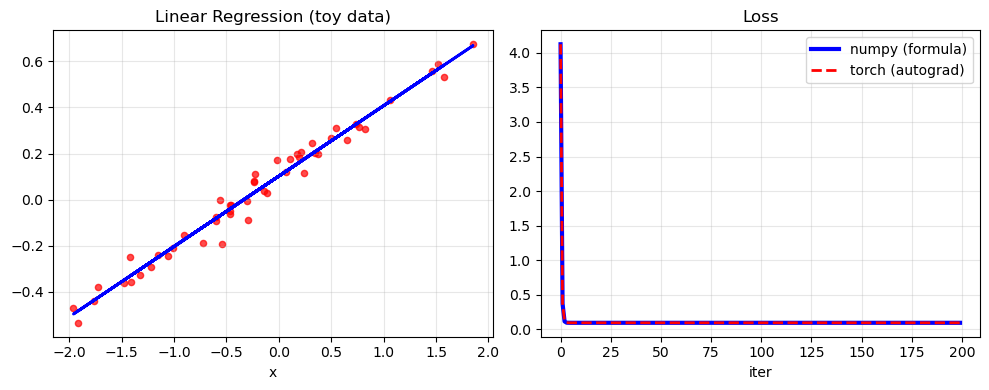

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(x, y, c='r', s=20, alpha=0.7)
axes[0].plot(x, X @ w_np, 'b-', lw=2)
axes[0].set_title('Linear Regression (toy data)'); axes[0].set_xlabel('x'); axes[0].grid(alpha=0.3)

axes[1].plot(loss_hist_np, 'b-', lw=3, label='numpy (formula)')
axes[1].plot(loss_hist_torch, 'r--', lw=2, label='torch (autograd)')
axes[1].set_title('Loss'); axes[1].set_xlabel('iter')
axes[1].legend(); axes[1].grid(alpha=0.3)

plt.tight_layout(); plt.show()

---
# 4. torch.optim 활용

방법 2에서 `w -= alpha * w.grad`로 가중치를 직접 갱신했습니다.  
`torch.optim`을 사용하면 이 갱신 과정마저도 `optimizer.step()` 한 줄로 대체됩니다.

> 지금은 단순한 SGD지만, 나중에 Adam, RMSprop 등 다양한 optimizer를 사용할 때  
> 학습 코드를 바꿀 필요 없이 **optimizer 선언만 교체**하면 됩니다.

In [17]:
w_optim = torch.tensor(w_init, dtype=torch.float32, requires_grad=True)
optimizer = torch.optim.SGD([w_optim], lr=alpha)
loss_hist_optim = []

for i in range(n_iter):
    loss = ((X_t @ w_optim - y_t)**2).sum()
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_optim.append(loss.item())
    if i % 50 == 0:
        print(f'iter {i:3d} | loss = {loss.item():.4f} | w = {w_optim.detach().numpy().flatten()}')

iter   0 | loss = 4.1254 | w = [0.03324687 0.2531974 ]
iter  50 | loss = 0.0925 | w = [0.10205109 0.3051538 ]
iter 100 | loss = 0.0925 | w = [0.10205109 0.3051538 ]
iter 150 | loss = 0.0925 | w = [0.10205109 0.3051538 ]


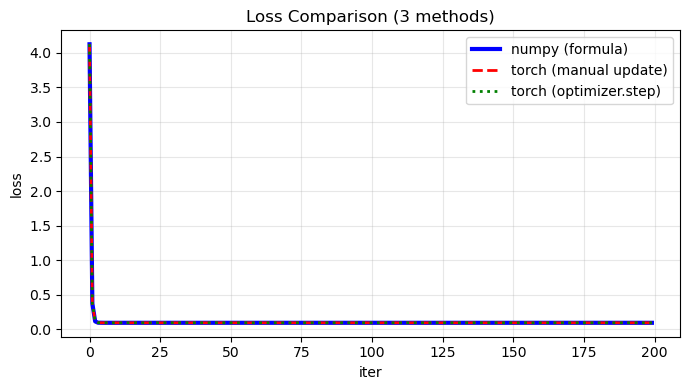

In [18]:
plt.figure(figsize=(7, 4))
plt.plot(loss_hist_np, 'b-', lw=3, label='numpy (formula)')
plt.plot(loss_hist_torch, 'r--', lw=2, label='torch (manual update)')
plt.plot(loss_hist_optim, 'g:', lw=2, label='torch (optimizer.step)')
plt.title('Loss Comparison (3 methods)')
plt.xlabel('iter'); plt.ylabel('loss')
plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()

---
# 요약

| 방법 | Gradient | Update | 코드량 |
|---|---|---|---|
| numpy (수식) | $\nabla J = 2\mathbf{X}^T(\mathbf{Xw}-\mathbf{y})$ | `w -= alpha * dJ` | 수식 유도 필요 |
| torch (manual) | `loss.backward()` | `w -= alpha * w.grad` | 자동 |
| torch (optim) | `loss.backward()` | `optimizer.step()` | 가장 간결 |

세 방법 모두 **동일한 loss, 동일한 w**를 산출합니다.